In [24]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from datetime import datetime


In [26]:
import numpy as np

In [2]:
df = pd.read_csv('AMZN.csv')

In [3]:
df1=df.reset_index()['Open']


In [12]:
df1

0        82.445000
1        83.649498
2        85.225502
3        84.928001
4        84.056000
           ...    
1254    116.040001
1255    122.370003
1256    121.449997
1257    120.690002
1258    124.919998
Name: Open, Length: 1259, dtype: float64

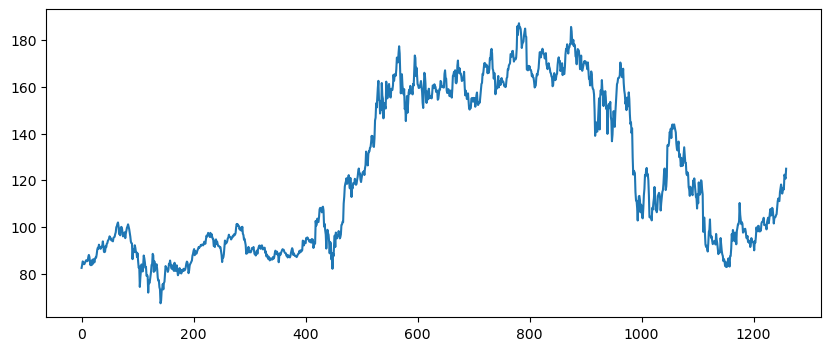

In [13]:
plt.figure(figsize=(10,4))
plt.plot(df1)

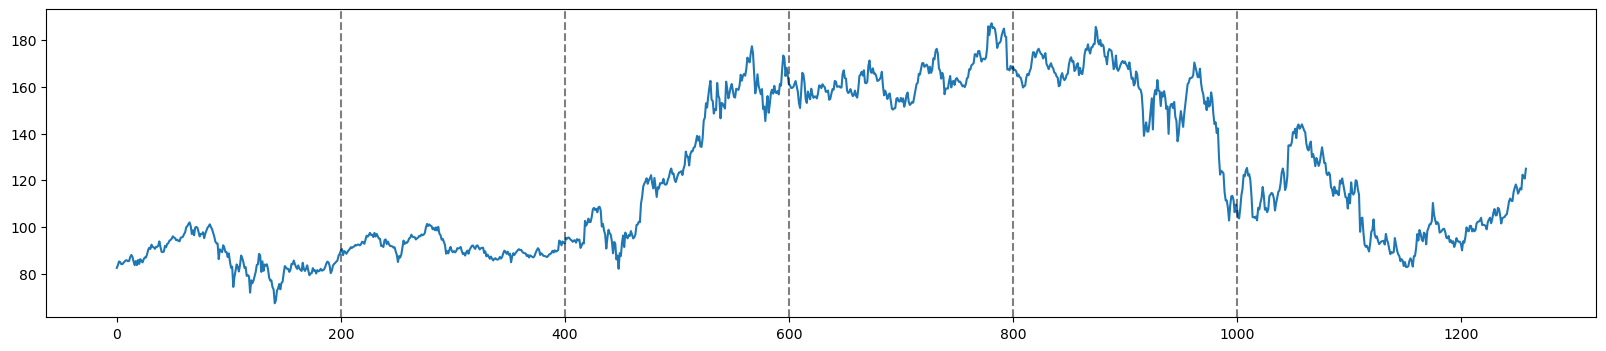

In [14]:
plt.figure(figsize=(20,4))
plt.plot(df1)
plt.axvline(200, color='k', linestyle='--', alpha=0.5)
plt.axvline(400, color='k', linestyle='--', alpha=0.5)
plt.axvline(600, color='k', linestyle='--', alpha=0.5)
plt.axvline(800, color='k', linestyle='--', alpha=0.5)

plt.axvline(1000, color='k', linestyle='--', alpha=0.5)

In [15]:

stl = STL(df1,period=12)
result = stl.fit()

In [16]:
seasonal, trend, resid = result.seasonal, result.trend, result.resid

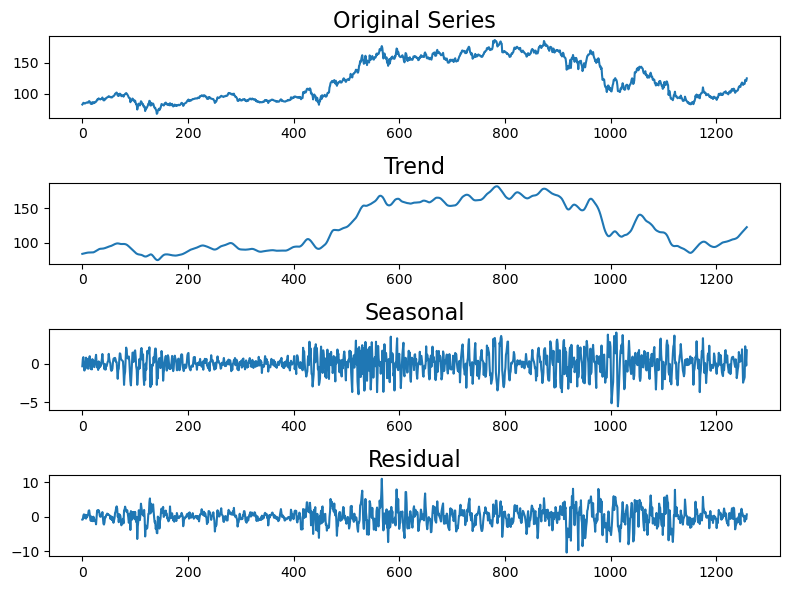

In [17]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(df1)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

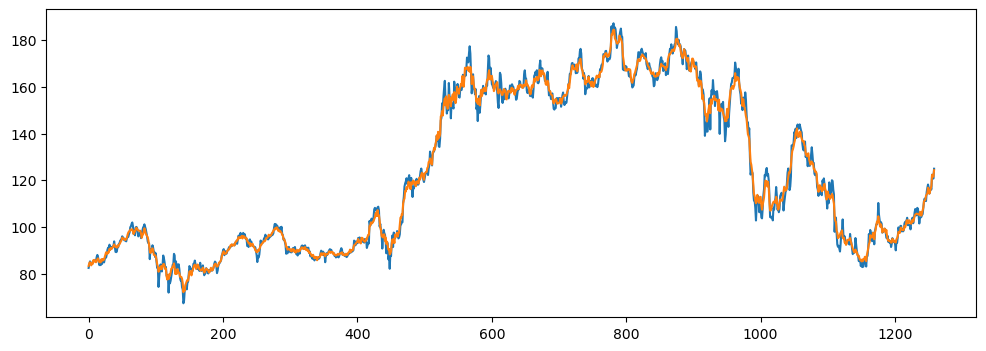

In [35]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(df1)
plt.plot(estimated)

In [18]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(29.0, 1229.0)

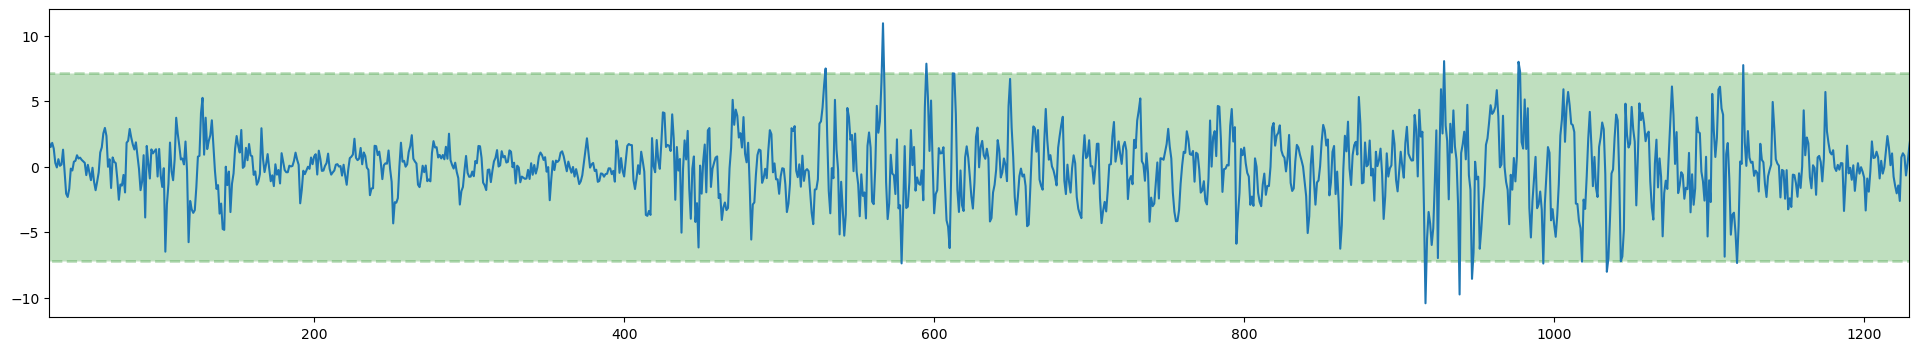

In [19]:
plt.figure(figsize=(24,4))
plt.plot(resid)

plt.fill_between([0, 1258], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(29, 1229)

In [20]:
anomalies = df1[(resid < lower) | (resid > upper)]

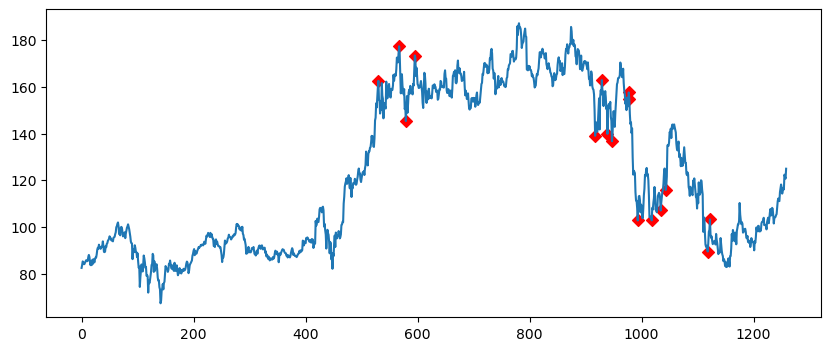

In [44]:
plt.figure(figsize=(10,4))
plt.plot(df1)  
plt.scatter(anomalies.index, anomalies.values, color='r', marker='D')

In [45]:
anomalies

530     162.552994
567     177.350006
579     145.324997
595     173.399506
917     139.000000
929     162.873505
939     139.837494
947     136.683502
977     157.602493
978     154.714005
993     102.750000
1018    102.800003
1034    107.029999
1043    115.790001
1118     89.470001
1122    103.209999
Name: Open, dtype: float64